In [154]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import calinski_harabasz_score
from sklearn.cluster import KMeans
import helper_funcs as my_funcs

from rdkit import Chem
from rdkit.Chem import AllChem, PandasTools
from rdkit.Chem.Draw import IPythonConsole

import plotly.express as px
import molplotly

In [4]:
co_sens_lib = pd.read_csv("AuxillaryInfo/co_sensitizers.csv", index_col=0)
print(list(co_sens_lib.loc[co_sens_lib["DyeName"]=="D35"].SMILES))

['CCCCOC(C=C(OCCCC)C=C1)=C1C(C=C2)=CC=C2N(C3=CC=C(C4=CC=C(/C=C(C#N)/C(O)=O)S4)C=C3)C5=CC=C(C6=CC=C(OCCCC)C=C6OCCCC)C=C5']


[14:48:56] Explicit valence for atom # 31 N, 4, is greater than permitted
[14:48:56] Explicit valence for atom # 27 N, 4, is greater than permitted
[14:48:56] Explicit valence for atom # 35 N, 4, is greater than permitted
[14:48:56] Explicit valence for atom # 1 B, 4, is greater than permitted
[14:48:56] SMILES Parse Error: unclosed ring for input: 'O=C(O)C(C=C1)=CC=C1C#C/C2=C3C=CC(/C(C4=C(OCCCCCCCCCCCC)C=CC=C4OCCCCCCCCCCCC)=C5C=C/C(N/5)=C(C#CC6=CC=C(N(C)C)C=C6)/C7=N/C(C=C7)=C(C8=C(OCCCCCCCCCCCC)C=CC=C8OCCCCCCCCCCCC)\C9=CC=C2N9)=N'
[14:48:56] SMILES Parse Error: syntax error while parsing: O=C(O)C(C=C1)=CC=C1C#C/C2=C3C=CC(/C(C4=C(OCCCCCCCCCCCC)C=CC=C4OCCCCCCCCCCCC)=C5C=C/C(N/5)=C(C#CC6=CC=C(N(C)C)C=C6)/C7=N/C(C=C7)=C(C8=C(OCCCCCCCCCCCC)C=CC=C8OCCCCCCCCCCCC)\C9=CC=C2N9)=N.O=C(O)C(C=C1)=CC=C1C#CC2=C3C(C=CC=C3)=C(C#CC4=CC=C(N(CCCCCCCC)CCCCCCCC)C=C4)C5=C2C=CC=C5
[14:48:56] SMILES Parse Error: Failed parsing SMILES 'O=C(O)C(C=C1)=CC=C1C#C/C2=C3C=CC(/C(C4=C(OCCCCCCCCCCCC)C=CC=C4OCCCCCCCCCC

,DyeName,SMILES,ROMol
0,Y123,CCCCCCC1(CCCCCC)C2=C(SC(/C=C(C#N)/C(O)=O)=C2)C...,
1,Zinc-porphyrin,CCCCCCCCOC1=C(C2=C3C=CC(C(C#CC4=CC=C(C(O)=O)C=...,None
2,N719,S=C=N[Ru]12(N=C=S)(N3CCC(CC3C3N2CCC(C3)C(=O)[O...,
3,C1,COC(C=C1)=CC=C1N(C2=C(C=CC=C3)C3=C(C#CC4=CC=C(...,
4,WS-5,CC(C=C1)=CC=C1N2C(C=CC(C3=CC=C(C4=CC=C(/C=C(C(...,
5,Zn-3,CC(C=C1C)=CC(C)=C1C2=C3C=CC(C(C4=C(C)C=C(C)C=C...,None
6,FNE46 cosensitizer,O=C(/C(C#N)=C/C(S1)=CC=C1C(C2=C3N=CC=N2)=CC=C3...,
7,D35,CCCCOC(C=C(OCCCC)C=C1)=C1C(C=C2)=CC=C2N(C3=CC=...,
8,TC2,CCCCCCOC(C=C1)=CC=C1N(C2=CC=C(C3=CC=C(/C=C(C#N...,
9,XW4,CCCCCCCCCCCCOC1=C(C2=C3C=CC(C(C#CC4=CC=C(C(O)=...,None

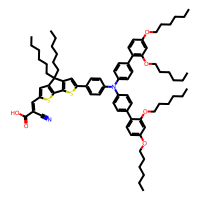
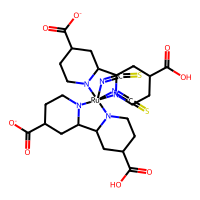
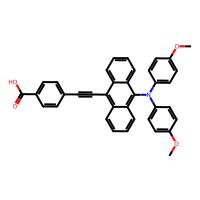
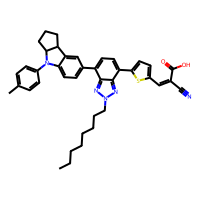
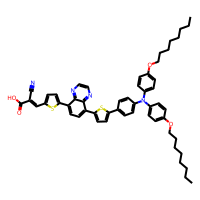
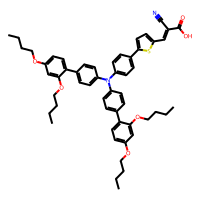
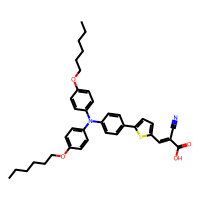
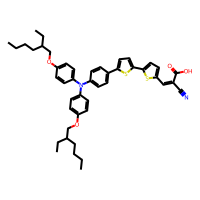
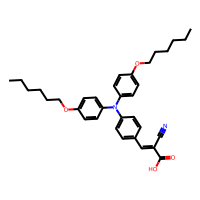
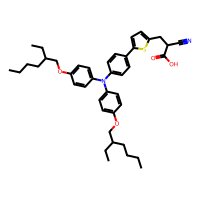
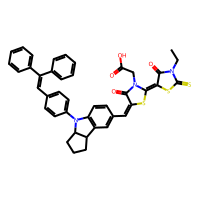
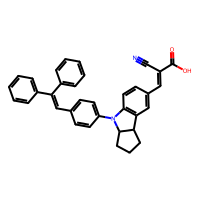
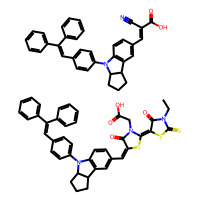
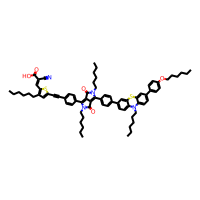
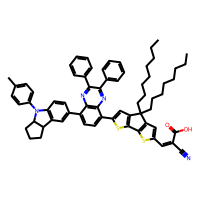
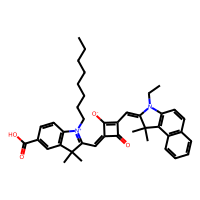
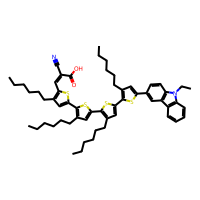
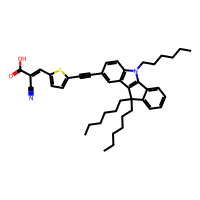
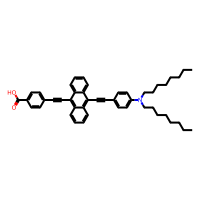
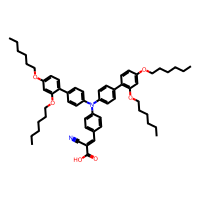
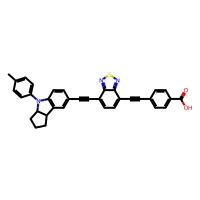
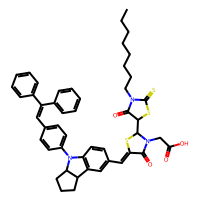

In [5]:
PandasTools.AddMoleculeColumnToFrame(co_sens_lib, smilesCol="SMILES")
co_sens_lib

In [6]:
trimmed_co_sens_lib = co_sens_lib.dropna(axis="index", how="any")
trimmed_co_sens_lib

,DyeName,SMILES,ROMol
0,Y123,CCCCCCC1(CCCCCC)C2=C(SC(/C=C(C#N)/C(O)=O)=C2)C...,<rdkit.Chem.rdchem.Mol object at 0x0000021DDAD...
2,N719,S=C=N[Ru]12(N=C=S)(N3CCC(CC3C3N2CCC(C3)C(=O)[O...,<rdkit.Chem.rdchem.Mol object at 0x0000021DDAD...
3,C1,COC(C=C1)=CC=C1N(C2=C(C=CC=C3)C3=C(C#CC4=CC=C(...,<rdkit.Chem.rdchem.Mol object at 0x0000021DDAD...
4,WS-5,CC(C=C1)=CC=C1N2C(C=CC(C3=CC=C(C4=CC=C(/C=C(C(...,<rdkit.Chem.rdchem.Mol object at 0x0000021DDAD...
6,FNE46 cosensitizer,O=C(/C(C#N)=C/C(S1)=CC=C1C(C2=C3N=CC=N2)=CC=C3...,<rdkit.Chem.rdchem.Mol object at 0x0000021DDAD...
7,D35,CCCCOC(C=C(OCCCC)C=C1)=C1C(C=C2)=CC=C2N(C3=CC=...,<rdkit.Chem.rdchem.Mol object at 0x0000021DDAD...
8,TC2,CCCCCCOC(C=C1)=CC=C1N(C2=CC=C(C3=CC=C(/C=C(C#N...,<rdkit.Chem.rdchem.Mol object at 0x0000021DDAD...
10,S2,CCCCC(CC)COC(C=C1)=CC=C1N(C2=CC=C(C3=CC=C(C4=C...,<rdkit.Chem.rdchem.Mol object at 0x0000021DDAD...
11,TC1,CCCCCCOC(C=C1)=CC=C1N(C2=CC=C(/C=C(C#N)/C(O)=O...,<rdkit.Chem.rdchem.Mol object at 0x0000021DDAD...
12,S1\ttriphenylamine,CCCCC(CC)COC(C=C1)=CC=C1N(C2=CC=C(C3=CC=C(CC(C...,<rdkit.Chem.rdchem.Mol object at 0x0000021DDAD...


In [7]:
co_sensitizer_fix_valence = {"Zinc-porphyrin": "CCCCCCCCOC1=C(/C2=C3C=CC(/C(C#CC4=CC=C(C(O)=O)C=C4)=C5C=C/C6=C(C7=C(OCCCCCCCC)C=CC=C7OCCCCCCCC)/C8=N/C(C=C8)=C(N(C9=CC=C(CCCCCC)C=C9)C%10=CC=C(CCCCCC)C=C%10)\C%11=CC=C2N%11[Zn]N6/5)=N3)C(OCCCCCCCC)=CC=C1",
                            "Zn-3": "CC(C=C1C)=CC(C)=C1/C2=C3C=CC(/C(C4=C(C)C=C(C)C=C4C)=C5C=C/C6=C(C7=CC=C(C(O)=O)C=C7)/C8=N/C(C=C8)=C(C9=C(C)C=C(C)C=C9C)\C%10=CC=C2N%10[Zn]N6/5)=N3",
                            "XW4": "CCCCCCCCCCCCOC1=C(/C2=C3C=CC(/C(C#CC4=CC=C(C(O)=O)C=C4)=C5C=C/C6=C(C7=C(OCCCCCCCCCCCC)C=CC=C7OCCCCCCCCCCCC)/C8=N/C(C=C8)=C(C#CC9=C(OCCCCCC)C=C(N%10C(C=CC=C%11)=C%11C%12=C%10C=CC=C%12)C(OCCCCCC)=C9)\C%13=CC=C2N%13[Zn]N6/5)=N3)C(OCCCCCCCCCCCC)=CC=C1",
                            "bodipy": "F[B-]1(F)[N+]2=C(C)C(CC)=C(C)C2=C(C3=C(C)C(CC)=C(C)N31)C4=CC=C(C#CCN5C=NC=C5)C=C4",
                            "H2LD14": "O=C(O)C(C=C1)=CC=C1C#C/C2=C3C=CC(/C(C4=C(OCCCCCCCCCCCC)C=CC=C4OCCCCCCCCCCCC)=C5C=C/C(N/5)=C(C#CC6=CC=C(N(C)C)C=C6)/C7=N/C(C=C7)=C(C8=C(OCCCCCCCCCCCC)C=CC=C8OCCCCCCCCCCCC)\C9=CC=C2N9)=N3",
                            "H2LD14+AN-3": "O=C(O)C(C=C1)=CC=C1C#C/C2=C3C=CC(/C(C4=C(OCCCCCCCCCCCC)C=CC=C4OCCCCCCCCCCCC)=C5C=C/C(N/5)=C(C#CC6=CC=C(N(C)C)C=C6)/C7=N/C(C=C7)=C(C8=C(OCCCCCCCCCCCC)C=CC=C8OCCCCCCCCCCCC)\C9=CC=C2N9)=N3.O=C(O)C(C=C1)=CC=C1C#CC2=C3C(C=CC=C3)=C(C#CC4=CC=C(N(CCCCCCCC)CCCCCCCC)C=C4)C5=C2C=CC=C5",
                            "HD2-mono": "CC(C=C1)=CC2=[N+]1[Ru]3([N+]4=C(C5=[N+]3C=CC(C(O)=O)=C5)C=C(C(O)=O)C=C4)(N=C=S)(N=C=S)[N+]6=C2C=C(/C=C/C7=CC=C(OCCO8)C8=C7)C=C6",
                            "D35+HD2-mono":"CCCCOC(C=C(OCCCC)C=C1)=C1C(C=C2)=CC=C2N(C3=CC=C(C4=CC=C(/C=C(C#N)/C(O)=O)S4)C=C3)C5=CC=C(C6=CC=C(OCCCC)C=C6OCCCC)C=C5.CC(C=C1)=CC2=[N+]1[Ru]3([N+]4=C(C5=[N+]3C=CC(C(O)=O)=C5)C=C(C(O)=O)C=C4)(N=C=S)(N=C=S)[N+]6=C2C=C(/C=C/C7=CC=C(OCCO8)C8=C7)C=C6"}

In [8]:
corrected_co_sens = pd.DataFrame.from_dict(data=co_sensitizer_fix_valence, orient="index").reset_index().rename(columns={"index":"DyeName", 0:"SMILES"})
corrected_co_sens

,DyeName,SMILES
0,Zinc-porphyrin,CCCCCCCCOC1=C(/C2=C3C=CC(/C(C#CC4=CC=C(C(O)=O)...
1,Zn-3,CC(C=C1C)=CC(C)=C1/C2=C3C=CC(/C(C4=C(C)C=C(C)C...
2,XW4,CCCCCCCCCCCCOC1=C(/C2=C3C=CC(/C(C#CC4=CC=C(C(O...
3,bodipy,F[B-]1(F)[N+]2=C(C)C(CC)=C(C)C2=C(C3=C(C)C(CC)...
4,H2LD14,O=C(O)C(C=C1)=CC=C1C#C/C2=C3C=CC(/C(C4=C(OCCCC...
5,H2LD14+AN-3,O=C(O)C(C=C1)=CC=C1C#C/C2=C3C=CC(/C(C4=C(OCCCC...
6,HD2-mono,CC(C=C1)=CC2=[N+]1[Ru]3([N+]4=C(C5=[N+]3C=CC(C...
7,D35+HD2-mono,CCCCOC(C=C(OCCCC)C=C1)=C1C(C=C2)=CC=C2N(C3=CC=...


,DyeName,SMILES,ROMol
0,Zinc-porphyrin,CCCCCCCCOC1=C(/C2=C3C=CC(/C(C#CC4=CC=C(C(O)=O)...,
1,Zn-3,CC(C=C1C)=CC(C)=C1/C2=C3C=CC(/C(C4=C(C)C=C(C)C...,
2,XW4,CCCCCCCCCCCCOC1=C(/C2=C3C=CC(/C(C#CC4=CC=C(C(O...,
3,bodipy,F[B-]1(F)[N+]2=C(C)C(CC)=C(C)C2=C(C3=C(C)C(CC)...,
4,H2LD14,O=C(O)C(C=C1)=CC=C1C#C/C2=C3C=CC(/C(C4=C(OCCCC...,
5,H2LD14+AN-3,O=C(O)C(C=C1)=CC=C1C#C/C2=C3C=CC(/C(C4=C(OCCCC...,
6,HD2-mono,CC(C=C1)=CC2=[N+]1[Ru]3([N+]4=C(C5=[N+]3C=CC(C...,
7,D35+HD2-mono,CCCCOC(C=C(OCCCC)C=C1)=C1C(C=C2)=CC=C2N(C3=CC=...,

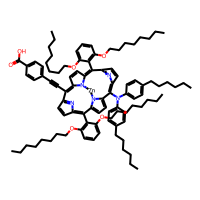
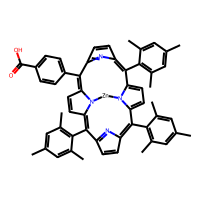
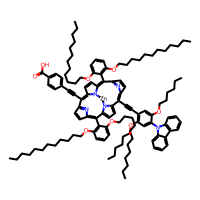
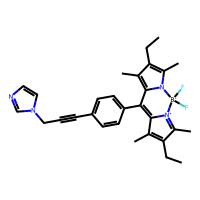
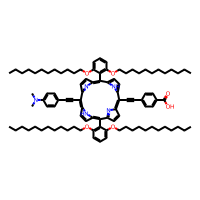
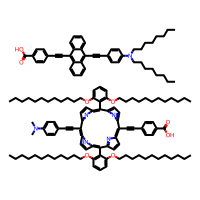
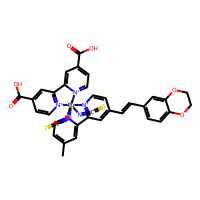
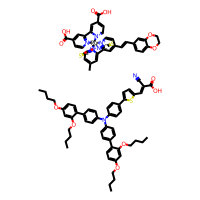

In [9]:
PandasTools.AddMoleculeColumnToFrame(corrected_co_sens, smilesCol="SMILES")
corrected_co_sens

In [11]:
final_co_sens_lib = pd.concat([trimmed_co_sens_lib, corrected_co_sens], axis="index", ignore_index=True)
final_co_sens_lib.to_csv("corrected_co_sens.csv")

In [12]:
PandasTools.WriteSDF(final_co_sens_lib, 'co_sensitizers.sdf', molColName="ROMol")

In [291]:
radius = 2
nBits = 576

ECPF6 = [AllChem.GetMorganFingerprintAsBitVect(x, radius=radius, nBits=nBits) for x in final_co_sens_lib["ROMol"]]

ecfp6_name = [f"Bit_{i}" for i in range(nBits)]
ecfp6_bits = [list(l) for l in ECPF6]

rdkit_df = pd.DataFrame(data=ecfp6_bits, columns=ecfp6_name)


<Axes: >

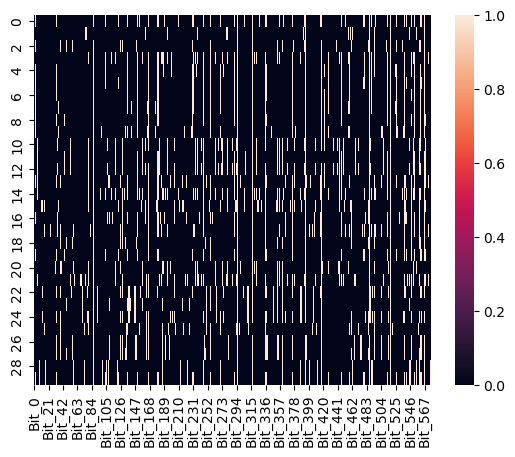

In [292]:
sns.heatmap(data=rdkit_df)

c:\Users\clarkep\AppData\Local\anaconda3\envs\my-rdkit-env\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

c:\Users\clarkep\AppData\Local\anaconda3\envs\my-rdkit-env\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

c:\Users\clarkep\AppData\Local\anaconda3\envs\my-rdkit-env\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

c:\Users\clarkep\AppData\Local\anaconda3\envs\my-rdkit-env\Lib\site-packages\sk

[Text(0.5, 1.0, 'k = 3')]

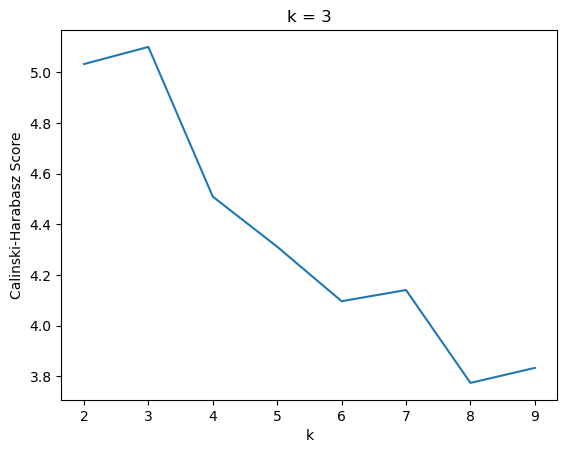

In [293]:
k_search = dict()
k_lst = []
ch_lst = []
for k in range(2, 10):
    k_lst.append(k)
    k_means = KMeans(n_clusters=k, n_init=15)
    k_means.fit(rdkit_df)
    ch_score_ = calinski_harabasz_score(rdkit_df, k_means.labels_)
    ch_lst.append(ch_score_)

k_search["k"] = k_lst
k_search["Calinski-Harabasz Score"] = ch_lst
k_means_df = pd.DataFrame.from_dict(data=k_search)
final_k = k_lst[ch_lst.index(max(ch_lst))]
sns.lineplot(data=k_means_df, x="k", y="Calinski-Harabasz Score").set(title=f"k = {final_k}")

c:\Users\clarkep\AppData\Local\anaconda3\envs\my-rdkit-env\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



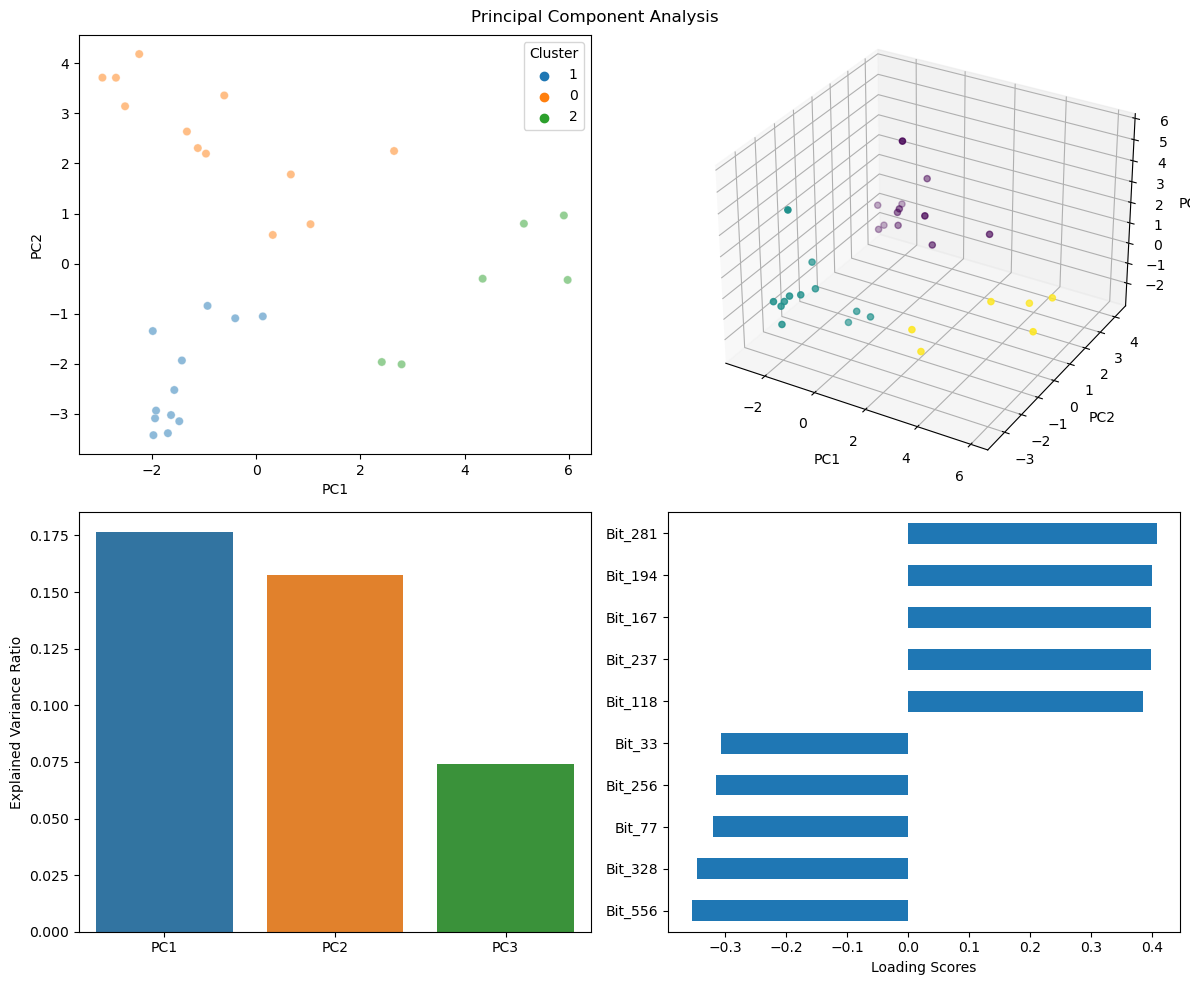

In [301]:
k_means = KMeans(n_clusters=3, n_init=15)
k_means.fit(rdkit_df)


component_names = ["PC1", "PC2", "PC3"]
pca = PCA(n_components=3)

co_sens_pca = pd.DataFrame(data=pca.fit_transform(rdkit_df), columns=component_names)
co_sens_pca["Cluster"] = [str(i) for i in k_means.labels_]
# ---- k_means ----


co_sens_pca_SMILES = pd.concat([co_sens_pca, final_co_sens_lib["SMILES"]], axis="columns")

co_sens_library = pd.concat([final_co_sens_lib["DyeName"], co_sens_pca_SMILES], axis="columns")


co_sens_library.to_csv("co_sensitizer_resolved.csv")

my_funcs.pca_dashboard(original_data=rdkit_df, pca=pca, pca_data=co_sens_pca_SMILES, hue="Cluster")


In [298]:
fig = px.scatter(co_sens_pca_SMILES, x="PC1", y="PC2", color="Cluster")

In [299]:
app = molplotly.add_molecules(
    fig = fig, df= co_sens_pca_SMILES, smiles_col="SMILES", color_col="Cluster"
)
app.run_server(mode='inline', port=8700, height=1000)

Dash is running on http://127.0.0.1:8700/

